In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model Definitions

#### Original from the paper

In [2]:
original = {
    "conv1":   {"kernel": 3, "in": 3,  "out": 64, "dims": 224},  
    
    "conv2":   {"kernel": 3, "in": 64, "out": 24, "dims": 112},
    
    "conv31":  {"kernel": 1, "in": 24, "out": 16, "dims": 56},
    "conv32":  {"kernel": 3, "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1, "in": 32, "out": 32, "dims": 56},
    "conv34":  {"kernel": 3, "in": 32, "out": 64, "dims": 56},
    
    "conv41":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv42":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "conv43":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv44":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "conv45":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv46":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    
    "conv51":  {"kernel": 1, "in": 64, "out": 32, "dims": 14},
    "conv52":  {"kernel": 3, "in": 32, "out": 64, "dims": 14},
    "conv53":  {"kernel": 1, "in": 64, "out": 32, "dims": 14},
    "conv54":  {"kernel": 3, "in": 32, "out": 64, "dims": 14},
    "conv55":  {"kernel": 3, "in": 64, "out": 64, "dims": 14},
    "conv56":  {"kernel": 3, "in": 64, "out": 64, "dims": 14},
    
    "conv61":  {"kernel": 3, "in": 64, "out": 64, "dims": 7},
    "conv62":  {"kernel": 3, "in": 64, "out": 64, "dims": 7},
    
    
    "linear1": {"in": 64, "out": 16},
    "linear2": {"in": 16, "out": 2},
}

#### Manually reduced by Wortel

In [3]:
downto_28 = {
    "conv1":   {"kernel": 3, "in": 3,  "out": 32, "dims": 224},  
    
    "conv2":   {"kernel": 3, "in": 32, "out": 16, "dims": 112},
    
    "conv31":  {"kernel": 1, "in": 16, "out": 16, "dims": 56},
    "conv32":  {"kernel": 3, "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1, "in": 32, "out": 32, "dims": 56},
    "conv34":  {"kernel": 3, "in": 32, "out": 64, "dims": 56},
    
    "conv41":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv42":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "conv43":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv44":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "conv45":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv46":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},  
    
    "linear1": {"in": 64, "out": 16},
    "linear2": {"in": 16, "out": 2},
}

#### After Aimet SVD and Pruning

In [4]:
aimet_original = {
    "conv1":   {"kernel": 3,      "in": 3,  "out": 24, "dims": 224}, 
    
    "conv20":  {"kernel": (3, 1), "in": 24, "out": 8, "dims": 112},
    "conv21":  {"kernel": (1, 3), "in": 8, "out": 16, "dims": 112},
    
    "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
    "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
    "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 56},
    "conv340": {"kernel": (3, 1), "in": 32, "out": 32, "dims": 56}, # ori 32, 32
    "conv341": {"kernel": (1, 3), "in": 32, "out": 64, "dims": 56}, # ori 32, 64
    
    "conv41":  {"kernel": 1,      "in": 64, "out": 32, "dims": 28}, # ori 64, 32
    "conv42":  {"kernel": 3,      "in": 32, "out": 64, "dims": 28}, # ori 32, 64
    "conv43":  {"kernel": 1,      "in": 64, "out": 32, "dims": 28}, # ori 64, 32
    "conv440": {"kernel": (3, 1), "in": 32, "out": 48, "dims": 28}, # ori 32, 48
    "conv441": {"kernel": (1, 3), "in": 48, "out": 64, "dims": 28}, # ori 48, 64
    "conv45":  {"kernel": 1,      "in": 64, "out": 32, "dims": 28}, # ori 64, 32
    "conv460": {"kernel": (3, 1), "in": 32, "out": 16, "dims": 28}, # ori 32, 16 
    "conv461": {"kernel": (1, 3), "in": 16, "out": 64, "dims": 28}, # ori 16, 64
    
    "linear1": {"in": 64, "out": 16},
    "linear2": {"in": 16, "out": 2},
}

#### Adapted for FPGA

In [5]:
# aimet_fpga = {
#     "conv1":   {"kernel": 3,      "in": 3,  "out": 12, "dims": 230},
    
#     "conv20":  {"kernel": (3, 1), "in": 12, "out": 24, "dims": 114},
#     "conv21":  {"kernel": (1, 3), "in": 24, "out": 16, "dims": 114},
    
#     "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
#     "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
#     "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
#     "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 54},
#     "conv340": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 54}, # ori 32, 32
#     "conv341": {"kernel": (1, 3), "in": 42, "out": 64, "dims": 54}, # ori 32, 64
    
#     "conv41":  {"kernel": 1,      "in": 64, "out": 30, "dims": 26}, # ori 64, 32
#     "conv42":  {"kernel": 3,      "in": 30, "out": 60, "dims": 26}, # ori 62, 64
#     "conv43":  {"kernel": 1,      "in": 60, "out": 32, "dims": 24}, # ori 64, 32
#     "conv440": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 24}, # ori 32, 48
#     "conv441": {"kernel": (1, 3), "in": 42, "out": 58, "dims": 24}, # ori 48, 64
#     "conv45":  {"kernel": 1,      "in": 58, "out": 32, "dims": 22}, # ori 64, 32
#     "conv460": {"kernel": (3, 1), "in": 32, "out": 20, "dims": 22}, # ori 32, 16 
#     "conv461": {"kernel": (1, 3), "in": 20, "out": 64, "dims": 22}, # ori 16, 64
    
#     "linear1": {"in": 64, "out": 32},
#     "linear2": {"in": 32, "out": 2},
# }

aimet_fpga = {
    "conv1":   {"kernel": 3,      "in": 3,  "out": 12, "dims": 230},
    
    "conv20":  {"kernel": (3, 1), "in": 12, "out": 24, "dims": 114},
    "conv21":  {"kernel": (1, 3), "in": 24, "out": 16, "dims": 114},
    
    "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
    "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
    "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 54},
    "conv340": {"kernel": (3, 1), "in": 32, "out": 40, "dims": 54}, # ori 32, 32
    "conv341": {"kernel": (1, 3), "in": 40, "out": 56, "dims": 54}, # ori 32, 64
    
    "conv41":  {"kernel": 1,      "in": 56, "out": 30, "dims": 26}, # ori 64, 32
    "conv42":  {"kernel": 3,      "in": 30, "out": 60, "dims": 26}, # ori 62, 64
    "conv43":  {"kernel": 1,      "in": 60, "out": 32, "dims": 24}, # ori 64, 32
    "conv440": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 24}, # ori 32, 48
    "conv441": {"kernel": (1, 3), "in": 42, "out": 58, "dims": 24}, # ori 48, 64
    "conv45":  {"kernel": 1,      "in": 58, "out": 32, "dims": 22}, # ori 64, 32
    "conv460": {"kernel": (3, 1), "in": 32, "out": 20, "dims": 22}, # ori 32, 16 
    "conv461": {"kernel": (1, 3), "in": 20, "out": 64, "dims": 22}, # ori 16, 64
    
    "linear1": {"in": 64, "out": 32},
    "linear2": {"in": 32, "out": 2},
}

# Function to compute MAC and Weights

In [6]:
def compute_macs_and_weights(model):
    for k in model.keys():
        if "conv" in k:
            if type(model[k]["kernel"]) == tuple:
                model[k].update({"mac": 
                    (model[k]["kernel"][0]*model[k]["kernel"][1]) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
                model[k].update({"weights": 
                    (model[k]["kernel"][0]*model[k]["kernel"][1]) * model[k]["in"] * model[k]["out"]})
            elif type(model[k]["kernel"]) == int:
                model[k].update({"mac": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
                model[k].update({"weights": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"]})
            else:
                print("Wrong model definition")
        elif "linear" in k:
            model[k].update({"mac": model[k]["in"] * model[k]["out"]})
            model[k].update({"weights": model[k]["in"] * model[k]["out"]})
        else:
            print("Wrong layer definition")

    model_macs = {k: model[k]["mac"]  for k in model.keys()}
    total_macs = np.array([v for v in model_macs.values()]).sum()
    model_weights = {k: model[k]["weights"]  for k in model.keys()}
    total_weights = np.array([v for v in model_weights.values()]).sum()

    return {
        "layers": model,
        "macs": model_macs,
        "total_macs": total_macs,
        "weights": model_weights,
        "total_weights": total_weights,
    }

In [7]:
original_ops = compute_macs_and_weights(original)
downto_28_ops = compute_macs_and_weights(downto_28)
aimet_original_ops = compute_macs_and_weights(aimet_original)
aimet_fpga_ops = compute_macs_and_weights(aimet_fpga)

In [8]:
print("Original model:"
      + f'\n\tMACs = {original_ops["total_macs"]}\n\tWeights = {original_ops["total_weights"]}')
print("Downto 28 model:" 
      + f'\n\tMACs = {downto_28_ops["total_macs"]}\n\tWeights = {downto_28_ops["total_weights"]}')
print("Aimet original model:"
      + f'\n\tMACs = {aimet_original_ops["total_macs"]}\n\tWeights = {aimet_original_ops["total_weights"]}')
print("Aimet FPGA model:"
      + f'\n\tMACs = {aimet_fpga_ops["total_macs"]}\n\tWeights = {aimet_fpga_ops["total_weights"]}')

Original model:
	MACs = 411042848
	Weights = 290912
Downto 28 model:
	MACs = 225592352
	Weights = 92288
Aimet original model:
	MACs = 118416416
	Weights = 58472
Aimet FPGA model:
	MACs = 108559536
	Weights = 57352


# Plot MACs and Weights Per Layer

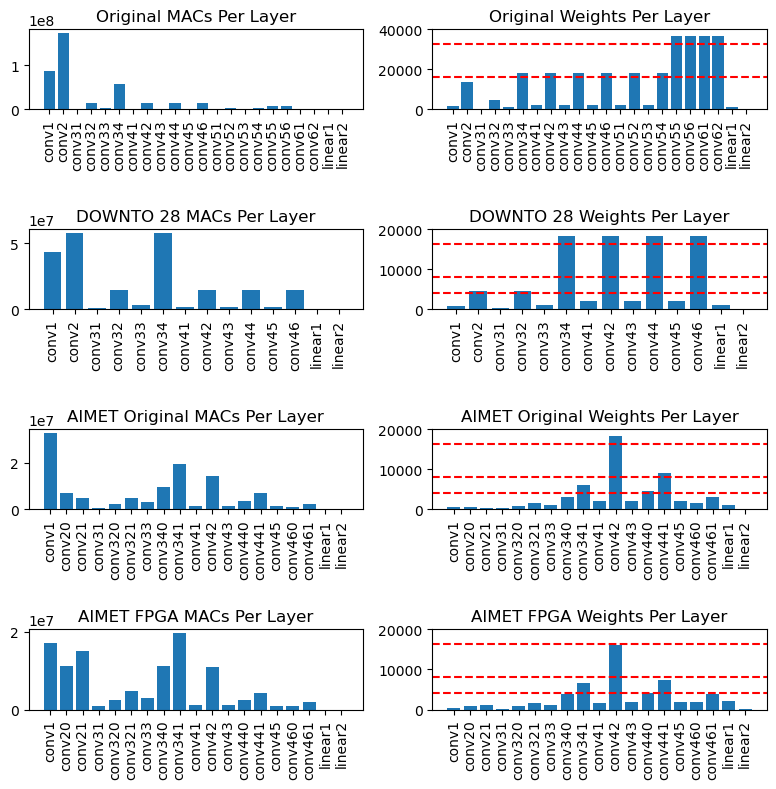

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(8,8))

######################## Original ########################
plt.subplot(4, 2, 1)
ax[0, 0].bar(list(original_ops["layers"].keys()), list(original_ops["macs"].values()))
ax[0, 0].set_xticks(list(original_ops["layers"].keys()))
ax[0, 0].set_xticklabels(list(original_ops["layers"].keys()), rotation=90)
ax[0, 0].set_title("Original MACs Per Layer")

plt.subplot(4, 2, 2)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=32768, color='r', linestyle='--')
plt.ylim([0, 40000])
ax[0, 1].bar(list(original_ops["layers"].keys()), list(original_ops["weights"].values()))
ax[0, 1].set_xticks(list(original_ops["layers"].keys()))
ax[0, 1].set_xticklabels(list(original_ops["layers"].keys()), rotation=90)
ax[0, 1].set_title("Original Weights Per Layer")

######################## DOWNTO 28 ########################
plt.subplot(4, 2, 3)
ax[1, 0].bar(list(downto_28_ops["layers"].keys()), list(downto_28_ops["macs"].values()))
ax[1, 0].set_xticks(list(downto_28_ops["layers"].keys()))
ax[1, 0].set_xticklabels(list(downto_28_ops["layers"].keys()), rotation=90)
ax[1, 0].set_title("DOWNTO 28 MACs Per Layer")

plt.subplot(4, 2, 4)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=16384/2, color='r', linestyle='--')
plt.axhline(y=16384/4, color='r', linestyle='--')
plt.ylim([0, 20000])
ax[1, 1].bar(list(downto_28_ops["layers"].keys()), list(downto_28_ops["weights"].values()))
ax[1, 1].set_xticks(list(downto_28_ops["layers"].keys()))
ax[1, 1].set_xticklabels(list(downto_28_ops["layers"].keys()), rotation=90)
ax[1, 1].set_title("DOWNTO 28 Weights Per Layer")

######################## AIMET ORIGINAL ########################
plt.subplot(4, 2, 5)
ax[2, 0].bar(list(aimet_original_ops["layers"].keys()), list(aimet_original_ops["macs"].values()))
ax[2, 0].set_xticks(list(aimet_original_ops["layers"].keys()))
ax[2, 0].set_xticklabels(list(aimet_original_ops["layers"].keys()), rotation=90)
ax[2, 0].set_title("AIMET Original MACs Per Layer")

plt.subplot(4, 2, 6)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=16384/2, color='r', linestyle='--')
plt.axhline(y=16384/4, color='r', linestyle='--')
plt.ylim([0, 20000])
ax[2, 1].bar(list(aimet_original_ops["layers"].keys()), list(aimet_original_ops["weights"].values()))
ax[2, 1].set_xticks(list(aimet_original_ops["layers"].keys()))
ax[2, 1].set_xticklabels(list(aimet_original_ops["layers"].keys()), rotation=90)
ax[2, 1].set_title("AIMET Original Weights Per Layer")

######################## AIMET FPGA ########################
plt.subplot(4, 2, 7)
ax[3, 0].bar(list(aimet_fpga_ops["layers"].keys()), list(aimet_fpga_ops["macs"].values()))
ax[3, 0].set_xticks(list(aimet_fpga_ops["layers"].keys()))
ax[3, 0].set_xticklabels(list(aimet_fpga_ops["layers"].keys()), rotation=90)
ax[3, 0].set_title("AIMET FPGA MACs Per Layer")

plt.subplot(4, 2, 8)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=16384/2, color='r', linestyle='--')
plt.axhline(y=16384/4, color='r', linestyle='--')
plt.axhline(y=32768, color='r', linestyle='--')
plt.ylim([0, 20000])
ax[3, 1].bar(list(aimet_fpga_ops["layers"].keys()), list(aimet_fpga_ops["weights"].values()))
ax[3, 1].set_xticks(list(aimet_fpga_ops["layers"].keys()))
ax[3, 1].set_xticklabels(list(aimet_fpga_ops["layers"].keys()), rotation=90)
ax[3, 1].set_title("AIMET FPGA Weights Per Layer")

plt.tight_layout()
plt.show()

In [10]:
# for k, v in aimet_original_ops["weights"].items():
#     print(f'{k:<10} {v}')

In [11]:
for k, v in aimet_fpga_ops["weights"].items():
    print(f'{k:<10} {v}')

conv1      324
conv20     864
conv21     1152
conv31     256
conv320    768
conv321    1536
conv33     1024
conv340    3840
conv341    6720
conv41     1680
conv42     16200
conv43     1920
conv440    4032
conv441    7308
conv45     1856
conv460    1920
conv461    3840
linear1    2048
linear2    64


In [12]:
for k, v in aimet_fpga_ops["macs"].items():
    print(f'{k:<10} {v}')

conv1      17139600
conv20     11228544
conv21     14971392
conv31     802816
conv320    2408448
conv321    4816896
conv33     2985984
conv340    11197440
conv341    19595520
conv41     1135680
conv42     10951200
conv43     1105920
conv440    2322432
conv441    4209408
conv45     898304
conv460    929280
conv461    1858560
linear1    2048
linear2    64
